In [2]:
import glob, json
import numpy as np
import pandas as pd
import s4_authors_stats as s4
import dask.dataframe as dd
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from scipy.stats import pearsonr, spearmanr
from matplotlib.colors import LogNorm

from functools import partial
from multiprocessing import Pool

In [2]:
SUFFIX = 2020
authors_fos = dd.read_csv('data/valid_authors_%d_fos_10a_full.csv' % SUFFIX, sep='\t', header=None, 
                          names=['author_id', 'weights', 'fos'], dtype={'fos': 'float64'})

# authors_fos = authors_fos.set_index('author_id', sorted=True)

authors_fos.head()

,author_id,weights,fos
0,5211,"{""185592680"": 2.5528422503422505, ""192562407"":...",86803240.0
1,6478,"{""121332964"": 0.10876623376623376, ""71924100"":...",86803240.0
2,11720,"{""121332964"": 6.0506721056721045, ""185592680"":...",185592680.0
3,15251,"{""127313418"": 0.39979657687991027, ""86803240"":...",86803240.0
4,16490,"{""121332964"": 3.018797061524334, ""205649164"": ...",86803240.0


In [14]:
def autor_weights_analysis(row):
    w_dict = json.loads(row['weights'])
    w_sum = sum(w_dict.values())
    w_max = max(w_dict.values())
 
    max2 = 0
    for v in w_dict.values():
        if(v >= max2 and v < w_max):
            max2 = v
    
    return w_max/w_sum, max2/w_sum

res = authors_fos.dropna(subset=['weights']).apply(autor_weights_analysis, axis=1, meta=(('float','float')))

In [15]:
res.head()

0    (0.45647505041255043, 0.4012408818033818)
1    (0.43921632280575096, 0.4151200929588689)
2    (0.5636558441558442, 0.13445938012604677)
3    (0.7728325805169903, 0.12613627420944007)
4     (0.5826177980247592, 0.1577357116258263)
Name: float, dtype: object

In [16]:
res.compute()

0          (0.45647505041255043, 0.4012408818033818)
1          (0.43921632280575096, 0.4151200929588689)
2          (0.5636558441558442, 0.13445938012604677)
3          (0.7728325805169903, 0.12613627420944007)
4           (0.5826177980247592, 0.1577357116258263)
                             ...                    
100248     (0.6097943722943724, 0.24334415584415586)
100249     (0.3115854053354053, 0.25239419839419835)
100250      (0.780418192918193, 0.07876475376475377)
100251      (0.535533185619509, 0.19682200163861283)
100252    (0.49751843835177184, 0.11162832179305045)
Name: float, Length: 2633341, dtype: object

In [17]:
x = []
y = []
for row in res:
    x.append(row[0])
    y.append(row[1])
    

(array([2.08000e+02, 2.75900e+03, 1.13000e+04, 2.65450e+04, 4.54250e+04,
        6.64950e+04, 9.14960e+04, 1.22634e+05, 1.44517e+05, 1.55944e+05,
        1.66557e+05, 1.79542e+05, 1.79787e+05, 1.68629e+05, 1.58386e+05,
        1.47461e+05, 1.38475e+05, 1.29053e+05, 1.21413e+05, 1.12459e+05,
        1.05576e+05, 9.81730e+04, 8.63890e+04, 6.85640e+04, 4.87690e+04,
        3.13760e+04, 1.69850e+04, 6.81000e+03, 1.46600e+03, 1.48000e+02]),
 array([0.09780126, 0.12787455, 0.15794784, 0.18802113, 0.21809443,
        0.24816772, 0.27824101, 0.3083143 , 0.33838759, 0.36846088,
        0.39853417, 0.42860747, 0.45868076, 0.48875405, 0.51882734,
        0.54890063, 0.57897392, 0.60904721, 0.6391205 , 0.6691938 ,
        0.69926709, 0.72934038, 0.75941367, 0.78948696, 0.81956025,
        0.84963354, 0.87970683, 0.90978013, 0.93985342, 0.96992671,
        1.        ]),
 <BarContainer object of 30 artists>)

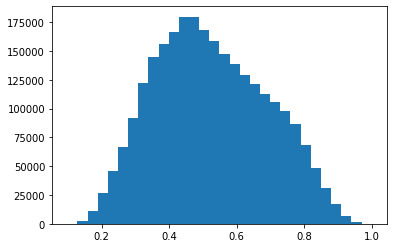

In [21]:
plt.hist(x,bins=30)

(array([6.16000e+02, 1.04230e+04, 3.24160e+04, 5.85100e+04, 8.66100e+04,
        1.10506e+05, 1.27170e+05, 1.40729e+05, 1.55090e+05, 1.67762e+05,
        1.78249e+05, 1.80442e+05, 1.78389e+05, 1.70279e+05, 1.59702e+05,
        1.48934e+05, 1.36126e+05, 1.21803e+05, 1.04596e+05, 8.70600e+04,
        7.12560e+04, 5.78600e+04, 4.74920e+04, 3.82400e+04, 2.89000e+04,
        1.93040e+04, 1.05260e+04, 3.67500e+03, 6.35000e+02, 4.10000e+01]),
 array([0.        , 0.01662698, 0.03325397, 0.04988095, 0.06650794,
        0.08313492, 0.0997619 , 0.11638889, 0.13301587, 0.14964286,
        0.16626984, 0.18289683, 0.19952381, 0.21615079, 0.23277778,
        0.24940476, 0.26603175, 0.28265873, 0.29928571, 0.3159127 ,
        0.33253968, 0.34916667, 0.36579365, 0.38242063, 0.39904762,
        0.4156746 , 0.43230159, 0.44892857, 0.46555556, 0.48218254,
        0.49880952]),
 <BarContainer object of 30 artists>)

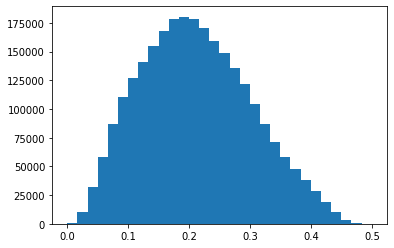

In [22]:
plt.hist(y, bins=30)

# TODO: utilizar o disparity filter [alpha 0.01/0.05/0.1???], verificar a quantidade de autores em diferentes áreas

In [ ]:
_ = plt.hist2d(x, y, bins=30)
# plt.colorbar()

In [4]:
SUFFIX = 2020

In [5]:
authors_infos = dd.read_csv('data/authors_infos_full_10a_final_%d' % SUFFIX, sep='\t', header=None, 
                            names=['author_id', 'birth_year', 'citation_count'])
authors_infos = authors_infos.set_index('author_id', sorted=True)
authors_infos.head()

,birth_year,citation_count
author_id,,
584,2012,"[3.0, 5.0, 0, 2.0, 1.0]"
859,1940,"[0, 2.0, 0]"
978,2009,"[0, 4.0, 7.0, 1.0, 0, 24.0, 0, 2.0, 0, 5.0, 6...."
1139,2003,"[0, 1.0, 0, 5.0]"
1476,2008,[0]
